# Source Term Plots

Here we do exactly that. Provide all the code to generate descriptive plots about the source term of the modified strongly damped wave equation given by the following equation:

$$\epsilon_{tt}(\rho,x,t) =\left\langle\frac{dE}{dx}\right\rangle \frac{v^2(x-vt)}{(2\pi \sigma^4)^{3/2}} \exp\left\{ \frac{1}{2\sigma^2} \left[\rho^2 + (x-v t)^2\right]\right\}$$

This was derived using the bethe bloch formula and a Guassian distribution forwarded by the heat equation.

In [1]:
# include modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define important variables
dE_dx  = 1
v      = 1
sigma  = 1

# Define the functions
e    = lambda r,x,t: dE_dx * v**2 * (x-v*t)/(2*np.pi*sigma**4)**(3/2) * np.exp(-(r**2 + (x-v*t)**2)/(2*sigma**2))
e_3D = lambda r,x,theta,t: dE_dx * v**2 * (x-v*t)/(2*np.pi*sigma**4)**(3/2) * np.exp(-(r**2 + (x-v*t)**2)/(2*sigma**2))

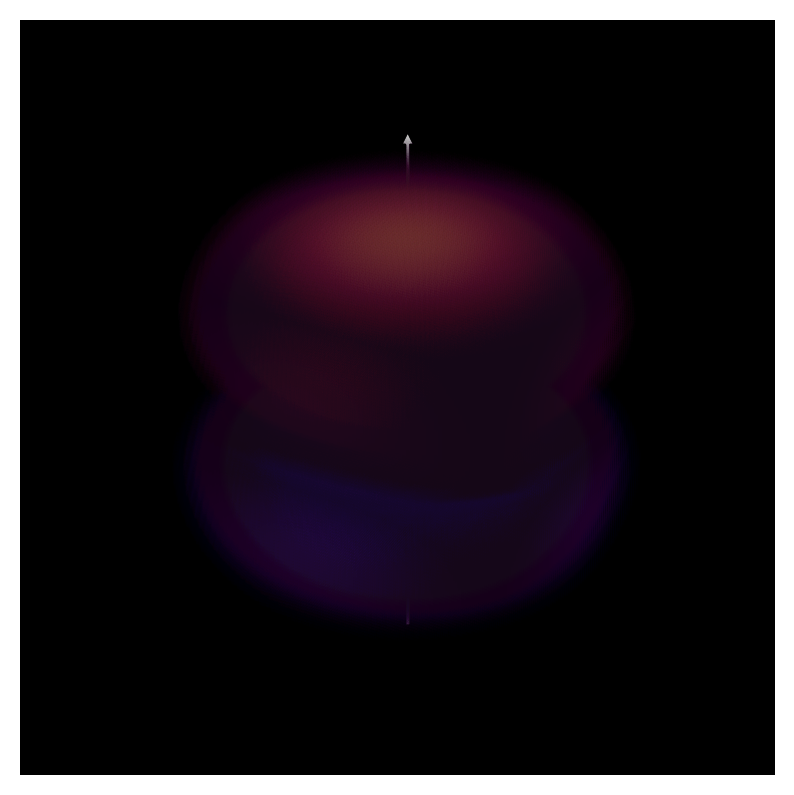

In [49]:
# Now we will do some fancy plotting
fig = plt.figure(figsize=(5,5),dpi=200)
fig.patch.set_alpha(0)
ax  = fig.add_subplot(111,projection='3d')
ax.set_alpha(0)
ax.set_facecolor('black')

# ax.set_title('Source Term at Time t')

plt.axis('off')

# Create the data
N_pts = 100
lim   = (-2,2)
# x,y,z = [np.linspace(*lim,N_pts)]*3

voxels = np.ones([N_pts]*3)

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

voxels = explode(voxels)
x, y, z = expand_coordinates(np.indices(np.array(voxels.shape) + 1))


t = 0
from matplotlib import cm
import matplotlib.colors as colors
F = np.ones([N_pts]*3)
for xi, X in enumerate(np.linspace(*lim,N_pts)):
    for yi, Y in enumerate(np.linspace(*lim,N_pts)):
        for zi, Z in enumerate(np.linspace(*lim,N_pts)):
            F[xi][yi][zi] = (e(np.sqrt(X**2 + Y**2),Z,t))


F/=np.max(F)
            
FF = np.ones([N_pts]*3).tolist()
for xi in range(N_pts):
    for yi in range(N_pts):
        for zi in range(N_pts):
            FF[xi][yi][zi] = colors.rgb2hex(cm.twilight((F[xi,yi,zi]+1)/2))\
            + '{0:0{1}X}'.format(int(50*abs(F[xi,yi,zi])),2)
FF = np.array(FF)
FF = explode(FF)
# F /= np.max(F)

# Add axis
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

ax.arrow3D(N_pts,N_pts,-2*N_pts/3,
           0,0,N_pts*10/3,
           mutation_scale=10,
           fc='#fff')

# ax.plot3D([N_pts,N_pts],[N_pts,N_pts],[-2*N_pts/3,N_pts*8/3],color='#fff')
ax.voxels(x, y, z, voxels,facecolors=FF,shade=True);

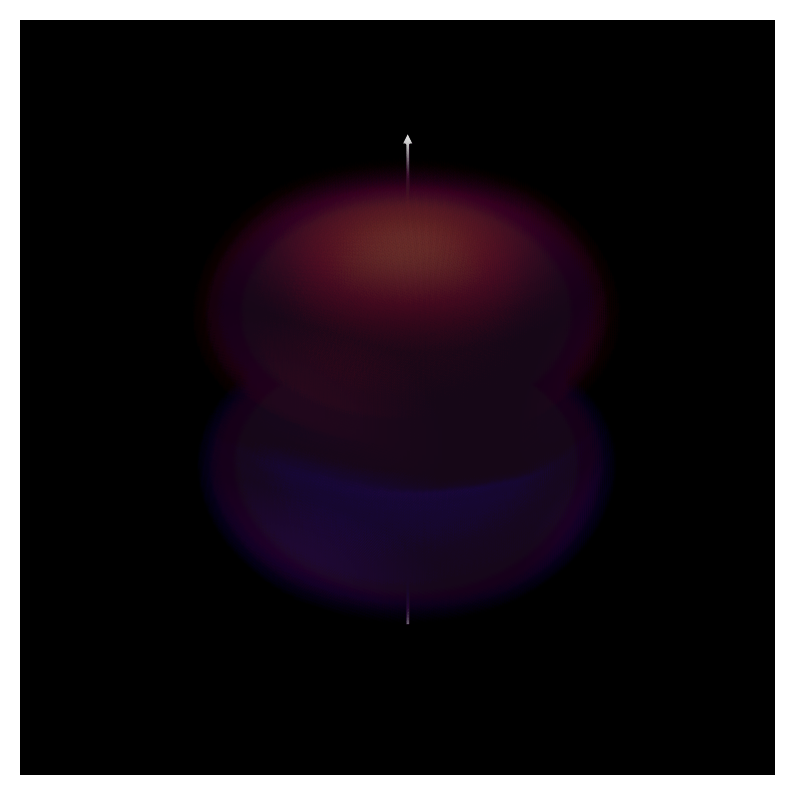

In [48]:
# Now we will do some fancy plotting
fig = plt.figure(figsize=(5,5),dpi=200)
fig.patch.set_alpha(0)
ax  = fig.add_subplot(111,projection='3d')
ax.set_alpha(0)
ax.set_facecolor('black')

# ax.set_title('Source Term at Time t')

plt.axis('off')

# Create the data
N_pts = 100
lim   = (-2,2)
# x,y,z = [np.linspace(*lim,N_pts)]*3

voxels = np.ones([N_pts]*3)

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

voxels = explode(voxels)
x, y, z = expand_coordinates(np.indices(np.array(voxels.shape) + 1))


t = 0
from matplotlib import cm
import matplotlib.colors as colors
F = np.ones([N_pts]*3)
for xi, X in enumerate(np.linspace(*lim,N_pts)):
    for yi, Y in enumerate(np.linspace(*lim,N_pts)):
        for zi, Z in enumerate(np.linspace(*lim,N_pts)):
            F[xi][yi][zi] = (e(np.sqrt(X**2 + Y**2),Z,t))


F/=np.max(F)
            
FF = np.ones([N_pts]*3).tolist()
for xi in range(N_pts):
    for yi in range(N_pts):
        for zi in range(N_pts):
            FF[xi][yi][zi] = colors.rgb2hex(cm.twilight((F[xi,yi,zi]+1)/2))\
            + '{0:0{1}X}'.format(int(50*abs(F[xi,yi,zi])),2)
FF = np.array(FF)
FF = explode(FF)
# F /= np.max(F)

# Add axis
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

ax.arrow3D(N_pts,N_pts,-2*N_pts/3,
           0,0,N_pts*10/3,
           mutation_scale=10,
           fc='#fff')

# ax.plot3D([N_pts,N_pts],[N_pts,N_pts],[-2*N_pts/3,N_pts*8/3],color='#fff')
ax.voxels(x, y, z, voxels,facecolors=FF,shade=True);